<a href="https://colab.research.google.com/github/kabutuu/AI_FASHION_MNIST_DATACLASSIFICATION-/blob/main/FASHION_MNIST_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

fashion mnist dataset

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

In [ ]:
(X_train, y_train), (X_test, y_test)=tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
X_train.shape,y_train.shape, "***************" , X_test.shape,y_test.shape

((60000, 28, 28), (60000,), '***************', (10000, 28, 28), (10000,))

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
y_train[0]

9

In [ ]:
class_labels = [	"T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt",	"Sneaker",	"Bag",	"Ankle boot"]

In [ ]:
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

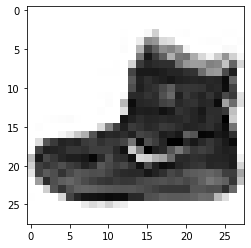

In [ ]:
plt.imshow(X_train[0],cmap='Greys')

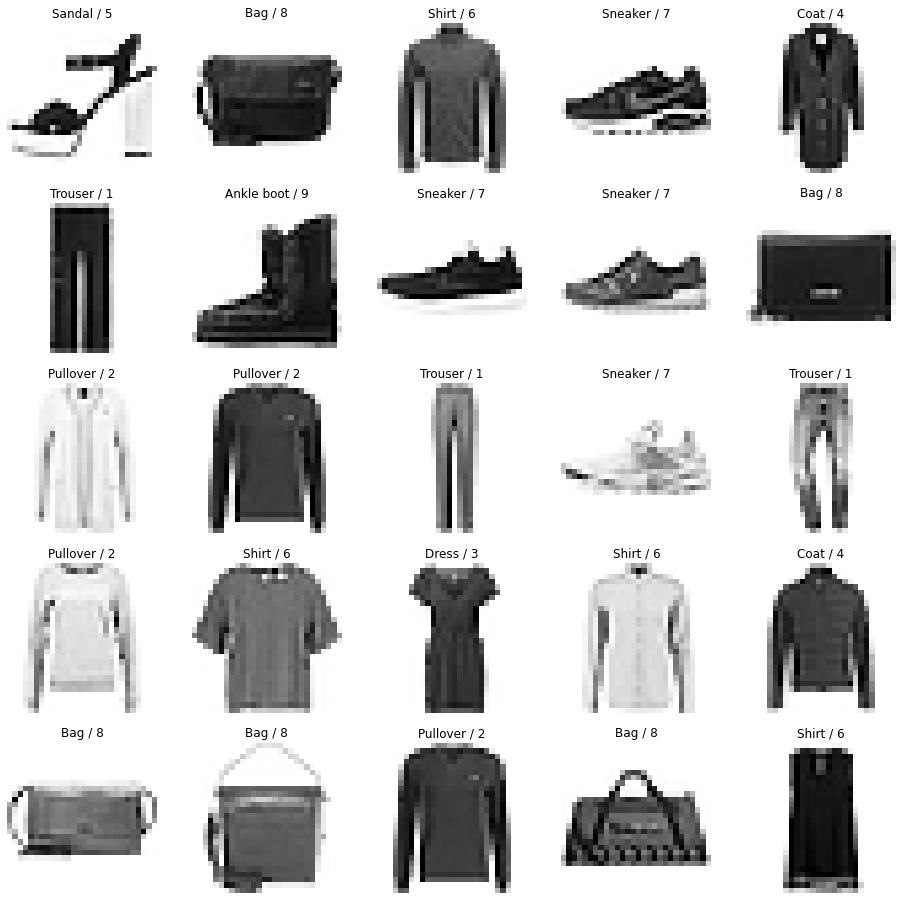

In [ ]:
plt.figure(figsize=(16,16))

j=1
for  i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);j+=1
  plt.imshow(X_train[i],cmap='Greys')
  plt.axis('off')
  plt.title('{} / {}'.format(class_labels[y_train[i]],y_train[i]))

In [ ]:
X_train.ndim

3

In [ ]:
X_train = np.expand_dims(X_train,-1)

In [ ]:
X_train.ndim

4

In [ ]:
X_test=np.expand_dims(X_test,-1)

In [ ]:
X_train = X_train/255
X_test= X_test/255

In [ ]:
from sklearn.model_selection import  train_test_split
X_train,X_Validation,y_train,y_Validation=train_test_split(X_train,y_train,test_size=0.2,random_state=2020)


In [ ]:
X_train.shape,X_Validation.shape,y_train.shape,y_Validation.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

**CNN MODEL**

In [ ]:
model=keras.models.Sequential([
                         keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128,activation='relu'),
                         keras.layers.Dense(units=10,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(X_Validation,y_Validation))

Epoch 1/10
94/94 [==============================] - 22s 229ms/step - loss: 0.5864 - accuracy: 0.7827 - val_loss: 0.5835 - val_accuracy: 0.7833
Epoch 2/10
94/94 [==============================] - 20s 217ms/step - loss: 0.5726 - accuracy: 0.7905 - val_loss: 0.5745 - val_accuracy: 0.7853
Epoch 3/10
94/94 [==============================] - 22s 230ms/step - loss: 0.5618 - accuracy: 0.7931 - val_loss: 0.5607 - val_accuracy: 0.7933
Epoch 4/10
94/94 [==============================] - 20s 216ms/step - loss: 0.5495 - accuracy: 0.7982 - val_loss: 0.5518 - val_accuracy: 0.7973
Epoch 5/10
94/94 [==============================] - 22s 232ms/step - loss: 0.5380 - accuracy: 0.8051 - val_loss: 0.5368 - val_accuracy: 0.8043
Epoch 6/10
94/94 [==============================] - 21s 223ms/step - loss: 0.5295 - accuracy: 0.8087 - val_loss: 0.5300 - val_accuracy: 0.8083
Epoch 7/10
94/94 [==============================] - 24s 251ms/step - loss: 0.5206 - accuracy: 0.8135 - val_loss: 0.5253 - val_accuracy: 0.8098

In [ ]:
y_pred = model.predict(X_test)
y_pred.round(2)

313/313 [==============================] - 4s 12ms/step


array([[0.  , 0.  , 0.  , ..., 0.39, 0.  , 0.53],
       [0.  , 0.  , 0.92, ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.03, 0.  , 0.  , ..., 0.  , 0.83, 0.  ],
       [0.  , 0.98, 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.27, 0.01, 0.01]], dtype=float32)

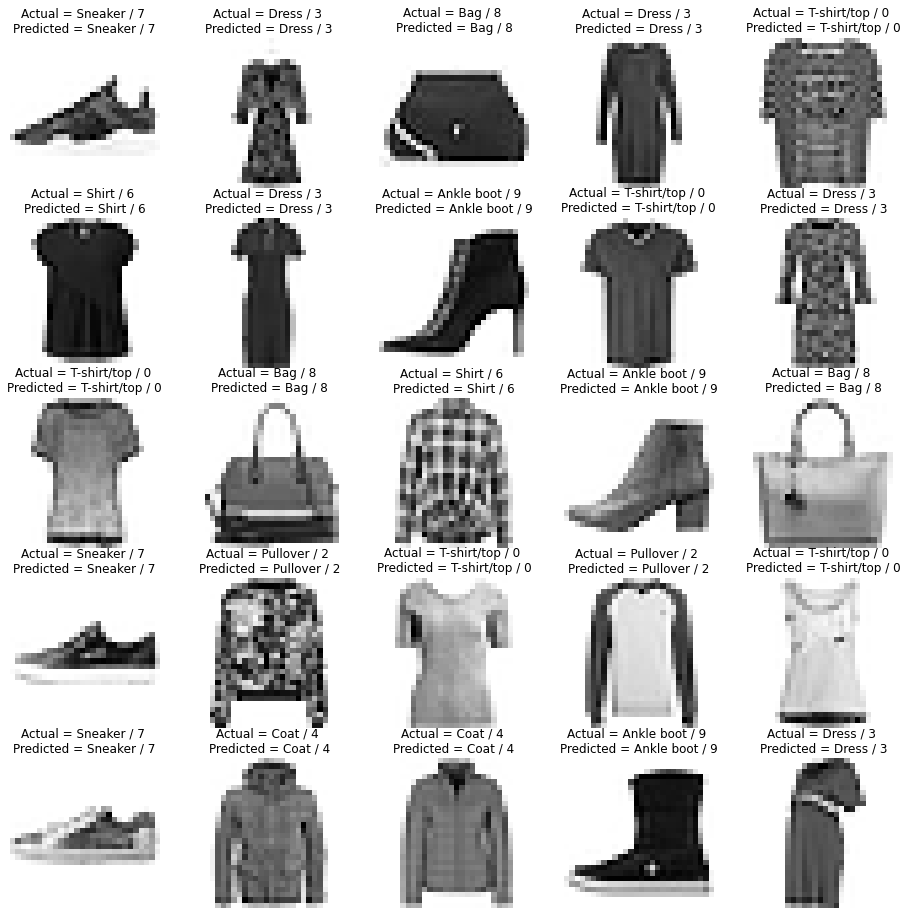

In [40]:
plt.figure(figsize=(16,16))
 
j=1
for i in np.random.randint(0, 1000,25):
  plt.subplot(5,5, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

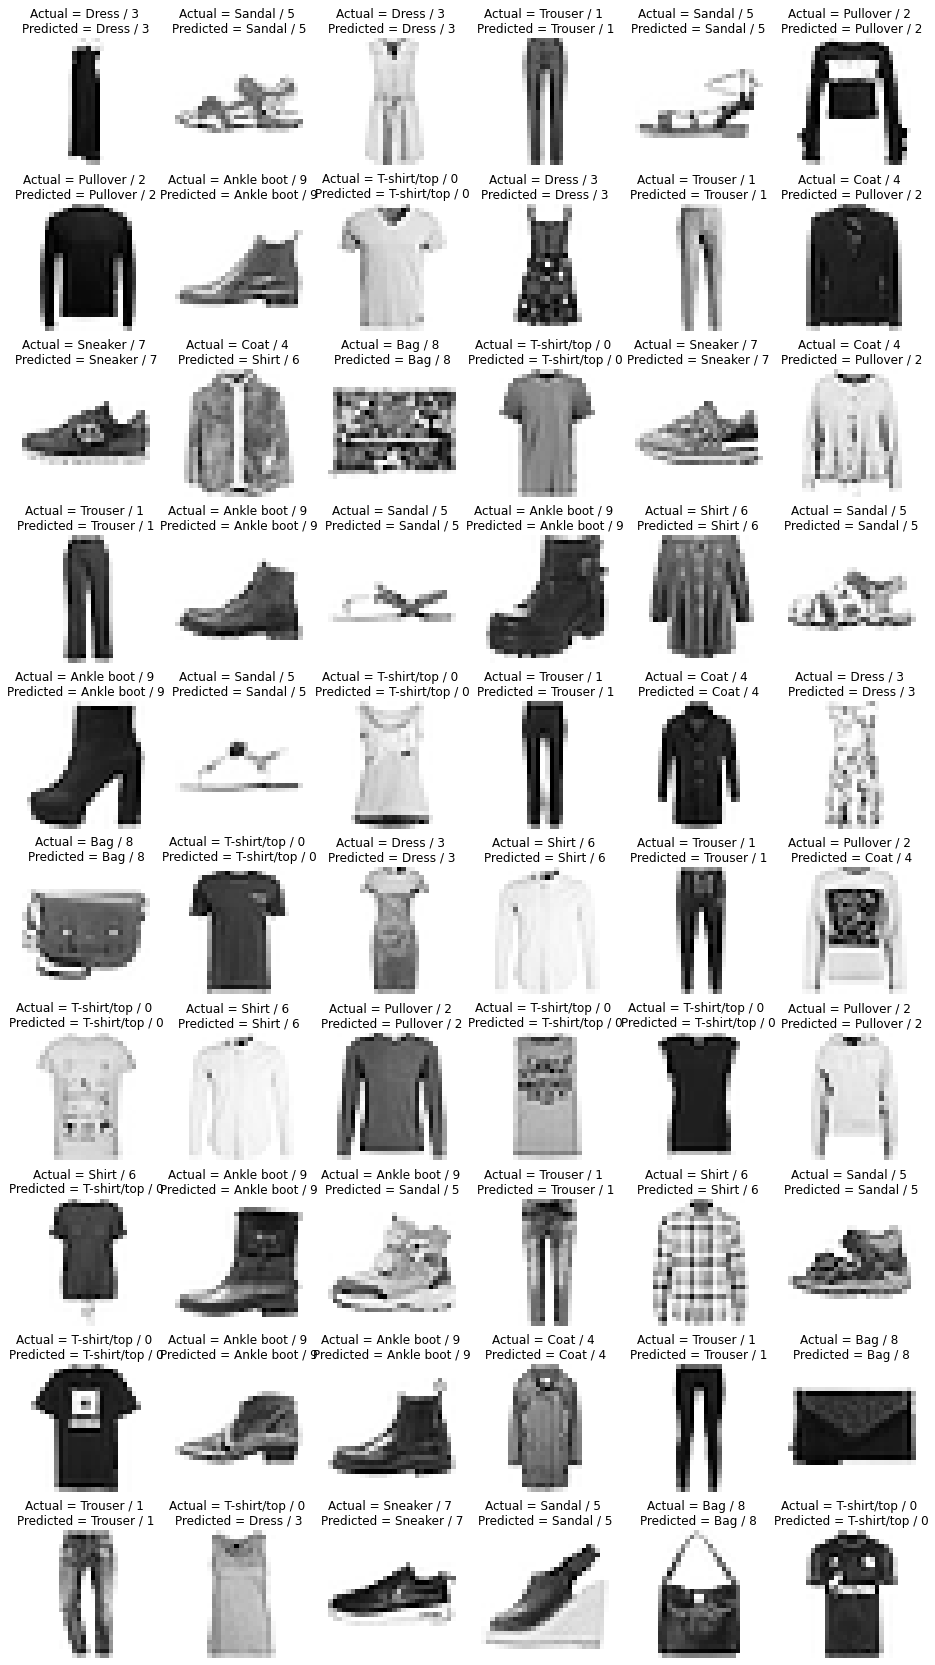

In [41]:
plt.figure(figsize=(16,30))
 
j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

In [43]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

<Figure size 1152x648 with 0 Axes>

              precision    recall  f1-score   support

 T-shirt/top       0.73      0.84      0.78      1000
     Trouser       0.96      0.94      0.95      1000
    Pullover       0.72      0.64      0.67      1000
       Dress       0.80      0.85      0.83      1000
        Coat       0.66      0.80      0.72      1000
      Sandal       0.93      0.90      0.91      1000
       Shirt       0.56      0.40      0.47      1000
     Sneaker       0.88      0.90      0.89      1000
         Bag       0.93      0.93      0.93      1000
  Ankle boot       0.91      0.92      0.92      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



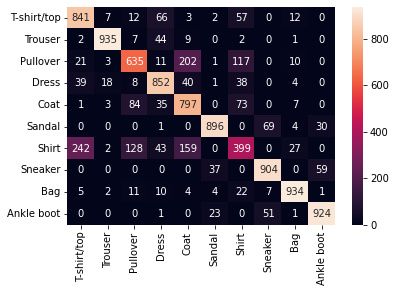

In [44]:
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)
 
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

In [46]:
model.save('fashion_mnist_cnn_model.h5')

In [47]:
cnn_model2 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
                         ])

In [48]:
cnn_model2.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [53]:
cnn_model2.fit(X_train, y_train, epochs=20, batch_size=512, verbose=1, validation_data=(X_Validation, y_Validation))
 
cnn_model2.save('fashion_mnist_cnn_model2.h5')

Epoch 1/20
94/94 [==============================] - 31s 323ms/step - loss: 1.0099 - accuracy: 0.5950 - val_loss: 0.8831 - val_accuracy: 0.6582
Epoch 2/20
94/94 [==============================] - 25s 269ms/step - loss: 0.8999 - accuracy: 0.6527 - val_loss: 0.8045 - val_accuracy: 0.6873
Epoch 3/20
94/94 [==============================] - 28s 296ms/step - loss: 0.8146 - accuracy: 0.6886 - val_loss: 0.7364 - val_accuracy: 0.7093
Epoch 4/20
94/94 [==============================] - 30s 322ms/step - loss: 0.7595 - accuracy: 0.7114 - val_loss: 0.7018 - val_accuracy: 0.7256
Epoch 5/20
94/94 [==============================] - 29s 303ms/step - loss: 0.7233 - accuracy: 0.7247 - val_loss: 0.6666 - val_accuracy: 0.7406
Epoch 6/20
94/94 [==============================] - 28s 296ms/step - loss: 0.6924 - accuracy: 0.7366 - val_loss: 0.6375 - val_accuracy: 0.7547
Epoch 7/20
94/94 [==============================] - 28s 293ms/step - loss: 0.6647 - accuracy: 0.7439 - val_loss: 0.6126 - val_accuracy: 0.7610

In [56]:
cnn_model3 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.5),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),                        
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.10),                         
                         keras.layers.Dense(units=10, activation='softmax')
                         ])
 

In [58]:
cnn_model3.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [60]:
cnn_model3.fit(X_train, y_train, epochs=50, batch_size=512, verbose=1, validation_data=(X_Validation, y_Validation))
 
cnn_model3.save('fashion_mnist_cnn_model3.h5')
 
cnn_model3.evaluate(X_test, y_test)

Epoch 1/50
94/94 [==============================] - 85s 850ms/step - loss: 2.3028 - accuracy: 0.0999 - val_loss: 2.3027 - val_accuracy: 0.0986
Epoch 2/50
94/94 [==============================] - 61s 645ms/step - loss: 1.9464 - accuracy: 0.2082 - val_loss: 1.5218 - val_accuracy: 0.3169
Epoch 3/50
94/94 [==============================] - 60s 641ms/step - loss: 1.2867 - accuracy: 0.4636 - val_loss: 0.9746 - val_accuracy: 0.6103
Epoch 4/50
94/94 [==============================] - 59s 624ms/step - loss: 0.9999 - accuracy: 0.6031 - val_loss: 0.8452 - val_accuracy: 0.6637
Epoch 5/50
94/94 [==============================] - 61s 649ms/step - loss: 0.9049 - accuracy: 0.6477 - val_loss: 0.7888 - val_accuracy: 0.6942
Epoch 6/50
94/94 [==============================] - 62s 663ms/step - loss: 0.8450 - accuracy: 0.6798 - val_loss: 0.7713 - val_accuracy: 0.7005
Epoch 7/50
94/94 [==============================] - 62s 664ms/step - loss: 0.7978 - accuracy: 0.7003 - val_loss: 0.7033 - val_accuracy: 0.7300

[0.40268492698669434, 0.849399983882904]